In [2]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

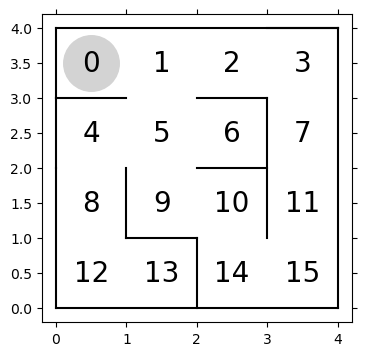

In [10]:
fig = plt.figure(figsize=(4,4))

# x x y y
plt.plot([0, 1], [3, 3], color='k')
plt.plot([2, 3], [3, 3], color='k')
plt.plot([0, 4], [0, 0], color='k')
plt.plot([0, 0], [0, 2], color='k')
plt.plot([3, 3], [1, 3], color='k')
plt.plot([1, 1], [1, 2], color='k')
plt.plot([2, 3], [2, 2], color='k')
plt.plot([2, 1], [1, 1], color='k')
plt.plot([2, 2], [0, 1], color='k')
plt.plot([0, 0], [4, 3], color='k')
plt.plot([0, 4], [4, 4], color='k')
plt.plot([0, 0], [2, 3], color='k')
plt.plot([3, 4], [4, 4], color='k')
plt.plot([4, 4], [0, 4], color='k')


for i in range(4):
    for j in range(4):
        plt.text(0.5+i, 3.5-j, str(i+j*4), size=20, ha='center', va='center')

circle, = plt.plot([0.5], [3.5], marker='o', color='#d3d3d3', markersize=40)

plt.tick_params(axis='both', which='both', bottom='off', top='off', 
        labelbottom='off', right='off', left='off', labelleft='off')
plt.box('off')


In [3]:
theta_0 = np.array([
    [np.nan, 1, 1, np.nan],
    [np.nan, 1, 1, 1],
    [np.nan, np.nan, np.nan, 1],
    [1, np.nan, 1, np.nan],
    [1, 1, np.nan, np.nan],
    [np.nan, np.nan, 1, 1],
    [1, 1, np.nan, np.nan],
    [np.nan, np.nan, np.nan, 1]])

In [4]:
def get_pi(theta):
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    exp_theta = np.exp(theta)
    for i in range(0, m):
        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
    pi = np.nan_to_num(pi)
    return pi

In [12]:
pi_0 = get_pi(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.33333333 0.33333333 0.33333333]
 [0.         0.         0.         1.        ]
 [0.5        0.         0.5        0.        ]
 [0.5        0.5        0.         0.        ]
 [0.         0.         0.5        0.5       ]
 [0.5        0.5        0.         0.        ]
 [0.         0.         0.         1.        ]]


In [13]:
def get_a(pi, s):
    return np.random.choice([0, 1, 2, 3], p=pi[s])

In [14]:
def get_a(pi, s):
    return np.random.choice([0, 1, 2, 3], p=pi[s])

def get_s_next(s, a):
    if a == 0:
        return s - 3
    elif a == 1:
        return s + 1
    elif a == 2:
        return s + 3
    elif a == 3:
        return s - 1

In [15]:
def play(pi):
    s = 0
    s_a_history = [[0, np.nan]]
    
    while True:
        a = get_a(pi, s)
        
        s_next = get_s_next(s, a)
        
        s_a_history[-1][1] = a
        s_a_history.append([s_next, np.nan])
        
        if s_next == 8:
            break
        else:
            s = s_next
    
    return s_a_history

In [16]:
s_a_history = play(pi_0)
print(s_a_history)

[[0, 2], [3, 0], [0, 1], [1, 1], [2, 3], [1, 3], [0, 1], [1, 1], [2, 3], [1, 3], [0, 1], [1, 2], [4, 0], [1, 1], [2, 3], [1, 2], [4, 0], [1, 1], [2, 3], [1, 3], [0, 2], [3, 2], [6, 0], [3, 2], [6, 0], [3, 0], [0, 1], [1, 3], [0, 2], [3, 0], [0, 1], [1, 2], [4, 1], [5, 3], [4, 1], [5, 3], [4, 0], [1, 1], [2, 3], [1, 2], [4, 1], [5, 2], [8, nan]]


In [17]:
def update_theta(theta, pi, s_a_history):
    eta = 0.1
    total = len(s_a_history) -1
    [s_count, a_count] = theta.shape

    delta_theta = theta.copy()
    for i in range(0, s_count):
        for j in range(0, a_count):
            if not(np.isnan(theta[i, j])):
                sa_ij = [sa for sa in s_a_history if sa == [i, j]]
                n_ij = len(sa_ij)

                sa_i = [sa for sa in s_a_history if sa[0] == i]
                n_i = len(sa_i)

                delta_theta[i, j]=(n_ij - pi[i, j] * n_i) / total

    return theta + eta * delta_theta

In [18]:
stop_epsilon = 10**-4
theta = theta_0
pi = pi_0

for episode in range(10000):
    sa_a_history = play(pi)

    theta = update_theta(theta, pi, s_a_history)

    pi_new = get_pi(theta)

    pi_delta = np.sum(np.abs(pi_new-pi))
    pi = pi_new

    print('エピソード: {}, ステップ: {}, 方策変化量: {:.4f}'.format(
        episode, len(s_a_history)-1, pi_delta
    ))

    if pi_delta < stop_epsilon:
        break

エピソード: 0, ステップ: 42, 方策変化量: 0.0082
エピソード: 1, ステップ: 42, 方策変化量: 0.0082
エピソード: 2, ステップ: 42, 方策変化量: 0.0081
エピソード: 3, ステップ: 42, 方策変化量: 0.0081
エピソード: 4, ステップ: 42, 方策変化量: 0.0080
エピソード: 5, ステップ: 42, 方策変化量: 0.0080
エピソード: 6, ステップ: 42, 方策変化量: 0.0079
エピソード: 7, ステップ: 42, 方策変化量: 0.0079
エピソード: 8, ステップ: 42, 方策変化量: 0.0078
エピソード: 9, ステップ: 42, 方策変化量: 0.0078
エピソード: 10, ステップ: 42, 方策変化量: 0.0077
エピソード: 11, ステップ: 42, 方策変化量: 0.0077
エピソード: 12, ステップ: 42, 方策変化量: 0.0076
エピソード: 13, ステップ: 42, 方策変化量: 0.0076
エピソード: 14, ステップ: 42, 方策変化量: 0.0075
エピソード: 15, ステップ: 42, 方策変化量: 0.0075
エピソード: 16, ステップ: 42, 方策変化量: 0.0074
エピソード: 17, ステップ: 42, 方策変化量: 0.0074
エピソード: 18, ステップ: 42, 方策変化量: 0.0074
エピソード: 19, ステップ: 42, 方策変化量: 0.0073
エピソード: 20, ステップ: 42, 方策変化量: 0.0073
エピソード: 21, ステップ: 42, 方策変化量: 0.0072
エピソード: 22, ステップ: 42, 方策変化量: 0.0072
エピソード: 23, ステップ: 42, 方策変化量: 0.0071
エピソード: 24, ステップ: 42, 方策変化量: 0.0071
エピソード: 25, ステップ: 42, 方策変化量: 0.0070
エピソード: 26, ステップ: 42, 方策変化量: 0.0070
エピソード: 27, ステップ: 42, 方策変化量: 0.0070
エピソード: 28, ステップ: 42, 方策変化量: 0.

エピソード: 254, ステップ: 42, 方策変化量: 0.0021
エピソード: 255, ステップ: 42, 方策変化量: 0.0021
エピソード: 256, ステップ: 42, 方策変化量: 0.0021
エピソード: 257, ステップ: 42, 方策変化量: 0.0021
エピソード: 258, ステップ: 42, 方策変化量: 0.0021
エピソード: 259, ステップ: 42, 方策変化量: 0.0021
エピソード: 260, ステップ: 42, 方策変化量: 0.0021
エピソード: 261, ステップ: 42, 方策変化量: 0.0021
エピソード: 262, ステップ: 42, 方策変化量: 0.0020
エピソード: 263, ステップ: 42, 方策変化量: 0.0020
エピソード: 264, ステップ: 42, 方策変化量: 0.0020
エピソード: 265, ステップ: 42, 方策変化量: 0.0020
エピソード: 266, ステップ: 42, 方策変化量: 0.0020
エピソード: 267, ステップ: 42, 方策変化量: 0.0020
エピソード: 268, ステップ: 42, 方策変化量: 0.0020
エピソード: 269, ステップ: 42, 方策変化量: 0.0020
エピソード: 270, ステップ: 42, 方策変化量: 0.0020
エピソード: 271, ステップ: 42, 方策変化量: 0.0020
エピソード: 272, ステップ: 42, 方策変化量: 0.0020
エピソード: 273, ステップ: 42, 方策変化量: 0.0020
エピソード: 274, ステップ: 42, 方策変化量: 0.0019
エピソード: 275, ステップ: 42, 方策変化量: 0.0019
エピソード: 276, ステップ: 42, 方策変化量: 0.0019
エピソード: 277, ステップ: 42, 方策変化量: 0.0019
エピソード: 278, ステップ: 42, 方策変化量: 0.0019
エピソード: 279, ステップ: 42, 方策変化量: 0.0019
エピソード: 280, ステップ: 42, 方策変化量: 0.0019
エピソード: 281, ステップ: 42, 方策変化量:

エピソード: 518, ステップ: 42, 方策変化量: 0.0008
エピソード: 519, ステップ: 42, 方策変化量: 0.0008
エピソード: 520, ステップ: 42, 方策変化量: 0.0008
エピソード: 521, ステップ: 42, 方策変化量: 0.0008
エピソード: 522, ステップ: 42, 方策変化量: 0.0008
エピソード: 523, ステップ: 42, 方策変化量: 0.0008
エピソード: 524, ステップ: 42, 方策変化量: 0.0008
エピソード: 525, ステップ: 42, 方策変化量: 0.0008
エピソード: 526, ステップ: 42, 方策変化量: 0.0008
エピソード: 527, ステップ: 42, 方策変化量: 0.0008
エピソード: 528, ステップ: 42, 方策変化量: 0.0008
エピソード: 529, ステップ: 42, 方策変化量: 0.0008
エピソード: 530, ステップ: 42, 方策変化量: 0.0008
エピソード: 531, ステップ: 42, 方策変化量: 0.0008
エピソード: 532, ステップ: 42, 方策変化量: 0.0008
エピソード: 533, ステップ: 42, 方策変化量: 0.0008
エピソード: 534, ステップ: 42, 方策変化量: 0.0007
エピソード: 535, ステップ: 42, 方策変化量: 0.0007
エピソード: 536, ステップ: 42, 方策変化量: 0.0007
エピソード: 537, ステップ: 42, 方策変化量: 0.0007
エピソード: 538, ステップ: 42, 方策変化量: 0.0007
エピソード: 539, ステップ: 42, 方策変化量: 0.0007
エピソード: 540, ステップ: 42, 方策変化量: 0.0007
エピソード: 541, ステップ: 42, 方策変化量: 0.0007
エピソード: 542, ステップ: 42, 方策変化量: 0.0007
エピソード: 543, ステップ: 42, 方策変化量: 0.0007
エピソード: 544, ステップ: 42, 方策変化量: 0.0007
エピソード: 545, ステップ: 42, 方策変化量:

エピソード: 812, ステップ: 42, 方策変化量: 0.0004
エピソード: 813, ステップ: 42, 方策変化量: 0.0004
エピソード: 814, ステップ: 42, 方策変化量: 0.0004
エピソード: 815, ステップ: 42, 方策変化量: 0.0004
エピソード: 816, ステップ: 42, 方策変化量: 0.0003
エピソード: 817, ステップ: 42, 方策変化量: 0.0003
エピソード: 818, ステップ: 42, 方策変化量: 0.0003
エピソード: 819, ステップ: 42, 方策変化量: 0.0003
エピソード: 820, ステップ: 42, 方策変化量: 0.0003
エピソード: 821, ステップ: 42, 方策変化量: 0.0003
エピソード: 822, ステップ: 42, 方策変化量: 0.0003
エピソード: 823, ステップ: 42, 方策変化量: 0.0003
エピソード: 824, ステップ: 42, 方策変化量: 0.0003
エピソード: 825, ステップ: 42, 方策変化量: 0.0003
エピソード: 826, ステップ: 42, 方策変化量: 0.0003
エピソード: 827, ステップ: 42, 方策変化量: 0.0003
エピソード: 828, ステップ: 42, 方策変化量: 0.0003
エピソード: 829, ステップ: 42, 方策変化量: 0.0003
エピソード: 830, ステップ: 42, 方策変化量: 0.0003
エピソード: 831, ステップ: 42, 方策変化量: 0.0003
エピソード: 832, ステップ: 42, 方策変化量: 0.0003
エピソード: 833, ステップ: 42, 方策変化量: 0.0003
エピソード: 834, ステップ: 42, 方策変化量: 0.0003
エピソード: 835, ステップ: 42, 方策変化量: 0.0003
エピソード: 836, ステップ: 42, 方策変化量: 0.0003
エピソード: 837, ステップ: 42, 方策変化量: 0.0003
エピソード: 838, ステップ: 42, 方策変化量: 0.0003
エピソード: 839, ステップ: 42, 方策変化量:

エピソード: 1112, ステップ: 42, 方策変化量: 0.0002
エピソード: 1113, ステップ: 42, 方策変化量: 0.0002
エピソード: 1114, ステップ: 42, 方策変化量: 0.0002
エピソード: 1115, ステップ: 42, 方策変化量: 0.0002
エピソード: 1116, ステップ: 42, 方策変化量: 0.0002
エピソード: 1117, ステップ: 42, 方策変化量: 0.0002
エピソード: 1118, ステップ: 42, 方策変化量: 0.0002
エピソード: 1119, ステップ: 42, 方策変化量: 0.0002
エピソード: 1120, ステップ: 42, 方策変化量: 0.0002
エピソード: 1121, ステップ: 42, 方策変化量: 0.0002
エピソード: 1122, ステップ: 42, 方策変化量: 0.0002
エピソード: 1123, ステップ: 42, 方策変化量: 0.0002
エピソード: 1124, ステップ: 42, 方策変化量: 0.0002
エピソード: 1125, ステップ: 42, 方策変化量: 0.0002
エピソード: 1126, ステップ: 42, 方策変化量: 0.0002
エピソード: 1127, ステップ: 42, 方策変化量: 0.0002
エピソード: 1128, ステップ: 42, 方策変化量: 0.0002
エピソード: 1129, ステップ: 42, 方策変化量: 0.0002
エピソード: 1130, ステップ: 42, 方策変化量: 0.0002
エピソード: 1131, ステップ: 42, 方策変化量: 0.0002
エピソード: 1132, ステップ: 42, 方策変化量: 0.0002
エピソード: 1133, ステップ: 42, 方策変化量: 0.0002
エピソード: 1134, ステップ: 42, 方策変化量: 0.0002
エピソード: 1135, ステップ: 42, 方策変化量: 0.0002
エピソード: 1136, ステップ: 42, 方策変化量: 0.0002
エピソード: 1137, ステップ: 42, 方策変化量: 0.0002
エピソード: 1138, ステップ: 42, 方策変化量: 0.0002
エ

エピソード: 1398, ステップ: 42, 方策変化量: 0.0001
エピソード: 1399, ステップ: 42, 方策変化量: 0.0001
エピソード: 1400, ステップ: 42, 方策変化量: 0.0001
エピソード: 1401, ステップ: 42, 方策変化量: 0.0001
エピソード: 1402, ステップ: 42, 方策変化量: 0.0001
エピソード: 1403, ステップ: 42, 方策変化量: 0.0001
エピソード: 1404, ステップ: 42, 方策変化量: 0.0001
エピソード: 1405, ステップ: 42, 方策変化量: 0.0001
エピソード: 1406, ステップ: 42, 方策変化量: 0.0001
エピソード: 1407, ステップ: 42, 方策変化量: 0.0001
エピソード: 1408, ステップ: 42, 方策変化量: 0.0001
エピソード: 1409, ステップ: 42, 方策変化量: 0.0001
エピソード: 1410, ステップ: 42, 方策変化量: 0.0001
エピソード: 1411, ステップ: 42, 方策変化量: 0.0001
エピソード: 1412, ステップ: 42, 方策変化量: 0.0001
エピソード: 1413, ステップ: 42, 方策変化量: 0.0001
エピソード: 1414, ステップ: 42, 方策変化量: 0.0001
エピソード: 1415, ステップ: 42, 方策変化量: 0.0001
エピソード: 1416, ステップ: 42, 方策変化量: 0.0001
エピソード: 1417, ステップ: 42, 方策変化量: 0.0001
エピソード: 1418, ステップ: 42, 方策変化量: 0.0001
エピソード: 1419, ステップ: 42, 方策変化量: 0.0001
エピソード: 1420, ステップ: 42, 方策変化量: 0.0001
エピソード: 1421, ステップ: 42, 方策変化量: 0.0001
エピソード: 1422, ステップ: 42, 方策変化量: 0.0001
エピソード: 1423, ステップ: 42, 方策変化量: 0.0001
エピソード: 1424, ステップ: 42, 方策変化量: 0.0001
エ

In [19]:
def animate(i):
    state = s_a_history[i][0]
    circle.set_data((state % 3) + 0.5, 2.5 - int(state / 3))
    return circle

anim = animation.FuncAnimation(fig, animate, \
    frames=len(s_a_history), interval=200, repeat=False)
HTML(anim.to_jshtml())

C:\Users\bundl\AppData\Local\Temp\ipykernel_18828\3980433709.py:3: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  circle.set_data((state % 3) + 0.5, 2.5 - int(state / 3))
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothi

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon